<a href="https://colab.research.google.com/github/giannisakritidis/PRML-Assignment/blob/main/Team37_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

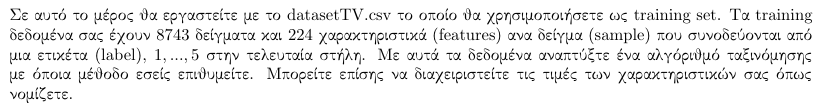


Our Task is to use the data of the datasetTV as our training set, in order to develop a Classification algorithm. Then we will implement our final trained model on the data of the datasetTest and output our final predictions


# **Importing necessary libraries**


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from google.colab import files

# **Data preprocessing**

##**Upload datasetTest.csv and datasetTV.csv**

In [ ]:
# Load files from Google Drive where they are already uploaded

!gdown https://drive.google.com/uc?id=1dDEZHBX5Uc-J93BFjeZmZQo3SAk8uwSM
!gdown https://drive.google.com/uc?id=1Zh9FpuFkrGAW3bHrw5C6NZoMpjsCab5j


Downloading...
From: https://drive.google.com/uc?id=1dDEZHBX5Uc-J93BFjeZmZQo3SAk8uwSM
To: /content/datasetTest.csv
100% 13.0M/13.0M [00:00<00:00, 101MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1Zh9FpuFkrGAW3bHrw5C6NZoMpjsCab5j
To: /content/datasetTV.csv
100% 16.4M/16.4M [00:00<00:00, 76.4MB/s]


##**Display the values of datasetTV and describe its features**

In [ ]:
#Load the datasetTV Dataset
datasetTV = pd.read_csv('datasetTV.csv', header = None)
display(datasetTV)
datasetTV.describe()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0.312530,-0.239400,-0.007568,0.526180,-0.090250,-0.26424,1.26620,0.057444,-0.233870,-0.428440,...,-0.54450,0.927700,-0.051764,-0.088081,-0.135800,1.188800,0.590240,0.131130,0.940970,1
1,-0.180790,0.439870,-0.146410,0.589490,-0.571440,1.31360,0.47487,0.018913,0.512120,-0.147690,...,0.49172,0.022198,0.936230,-0.218210,0.063382,-0.358710,-0.039761,0.757320,0.498340,2
2,0.794690,-0.053940,0.002950,-0.134920,0.509670,1.02670,0.40173,-0.180840,0.449860,-0.272450,...,-0.23305,0.023855,-0.225070,0.589430,0.219000,0.867800,0.138840,1.080800,-0.542270,5
3,-0.056284,-0.224070,-0.237710,-0.065823,-0.086943,1.00600,-0.47638,0.016027,0.163520,-0.284360,...,-0.35707,0.302740,0.081736,-0.312950,-0.364090,-0.043227,1.171200,-0.135440,-0.077792,2
4,0.459540,0.346550,-0.056755,0.512780,0.221310,-0.27498,0.95194,0.682520,0.460480,0.063208,...,0.34516,-0.206390,0.026514,-0.304530,0.307200,1.047100,0.921490,0.733020,0.670780,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,-0.175760,0.289910,-0.352760,0.010021,0.413240,1.07210,0.36960,0.913010,-0.381220,-0.361110,...,-0.39277,-0.005587,0.092053,0.296480,-0.083377,-0.256320,0.070252,-0.230670,0.178310,2
8739,0.377070,0.034885,0.262380,0.217850,0.172200,0.16139,0.12993,0.600260,0.019669,0.091555,...,0.23158,0.424180,-0.247490,-0.082691,-0.241830,0.207260,0.096817,0.694230,-0.182070,4
8740,1.214500,-0.313790,0.507320,-0.493680,0.921990,0.39320,0.90520,-0.072055,-0.460310,-0.032393,...,-0.31410,-0.764840,0.249630,0.390790,0.178840,-0.181940,0.355300,-0.052214,0.128040,4
8741,1.244300,-0.173910,1.410800,0.517600,0.767560,1.39010,0.59400,0.482670,-0.345180,-0.115000,...,0.21063,0.824450,0.424030,-0.099364,0.090958,-0.498750,0.806600,0.857060,0.539360,4


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
count,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,...,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000
mean,0.360086,0.001636,0.343860,0.177411,0.199805,0.522868,0.374971,0.515616,0.041620,-0.002033,...,0.039921,0.236045,0.017460,-0.000181,0.099152,0.589612,0.293870,0.505508,0.336356,3.002974
std,0.545784,0.321264,0.537970,0.479141,0.469726,0.559579,0.552721,0.559624,0.359096,0.315393,...,0.363500,0.499744,0.334342,0.315676,0.422491,0.557340,0.526766,0.566306,0.539380,1.420828
min,-1.052900,-1.492000,-1.168500,-1.154900,-1.238800,-1.170100,-1.107700,-1.100400,-1.099600,-1.250200,...,-1.135700,-1.425500,-1.293200,-1.204800,-1.247600,-0.996050,-1.199500,-1.128500,-1.262700,1.000000
25%,-0.056065,-0.212760,-0.059468,-0.154845,-0.121140,0.075904,-0.055405,0.067974,-0.199340,-0.215180,...,-0.196505,-0.124815,-0.200560,-0.212570,-0.181110,0.150170,-0.092223,0.047072,-0.066114,2.000000
50%,0.273600,0.004490,0.254900,0.102000,0.126890,0.520860,0.289280,0.502110,0.022291,-0.003436,...,0.020447,0.142230,0.010184,-0.003301,0.058561,0.632400,0.200250,0.491010,0.244160,3.000000
75%,0.772390,0.212595,0.739950,0.428225,0.449460,0.962550,0.813090,0.970790,0.257875,0.215170,...,0.248805,0.524955,0.224765,0.216025,0.315955,1.034800,0.658455,0.975250,0.737990,4.000000
max,2.035000,1.582200,2.075400,1.928000,1.934200,2.274400,2.256800,2.219700,1.694600,1.177000,...,1.841900,2.091700,1.896100,1.327000,2.203600,2.311800,2.306800,2.106100,2.272200,5.000000


##**Check for missing values on datasetTV**##

In [ ]:
# Now we should check for missing values
print(datasetTV.isnull().values.any())
# We see it prints False so there are no missing values

False


##**Extract the labels from the dataset**##

Split the training set into features (X) and labels (y). Since the last column is the labels, we include all columns except the last one in the features' matrix

In [ ]:
# Iloc is used to locate and extract specific rows and columns within our data table by their numerical positions
X = datasetTV.iloc[..., :-1] # Select all the rows and all the columns except the last one, from the datasetTV
numOfFeatures = np.size(X, 1)
print(f"The number of features is {numOfFeatures}")
y = datasetTV.iloc[..., -1].astype(int) # Select all the rows and only the last column, from the datasetTV, and make sure they the values are converted to integers

The number of features is 224


##**Consider Feature Selection**##

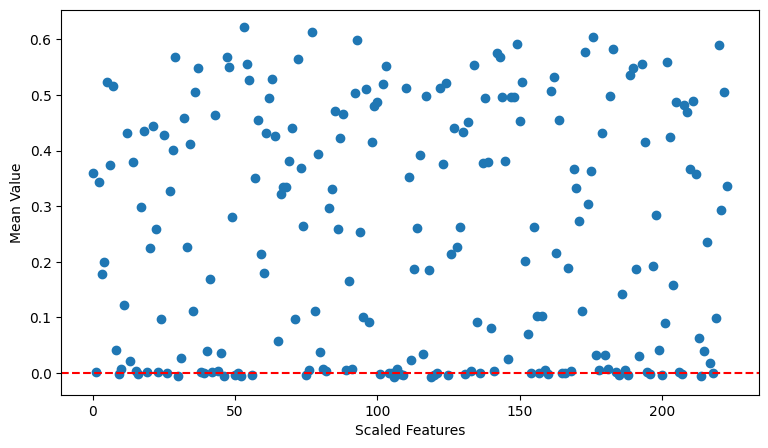

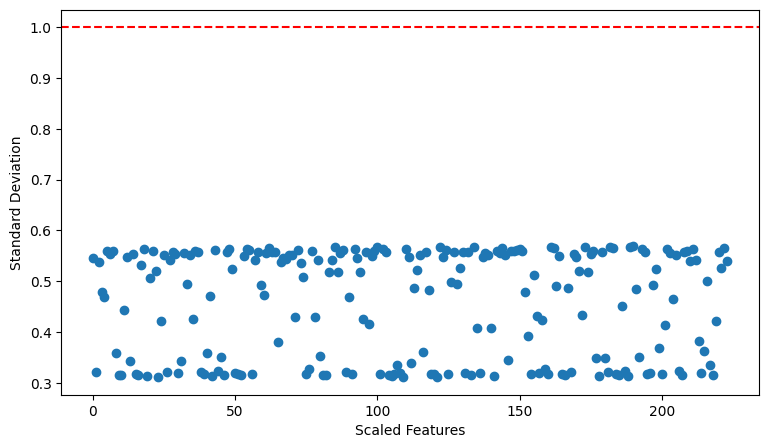

In [ ]:
#Plot features mean values
plt.figure(figsize=(9, 5))
plt.scatter(range(numOfFeatures), np.mean(X, axis=0))
plt.xlabel('Scaled Features')
plt.ylabel('Mean Value')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

print("\n")

#Plot features standard deviation
plt.figure(figsize=(9, 5))
plt.scatter(range(numOfFeatures), np.std(X, axis=0))
plt.xlabel('Scaled Features')
plt.ylabel('Standard Deviation')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

We want to examine the Standard Deviation of the features to see if there are features with very low STD (these will be considered unnecessary and can be omitted).
We can see from the STD plot above that all the features have standard deviation between ~0.3 and 0.6. This suggests that the features have reasonable variance and no feature seems to have very low variance, which would lead us to remove it.
We will also display the Correlation Matrix for our features to see if there are correlated features

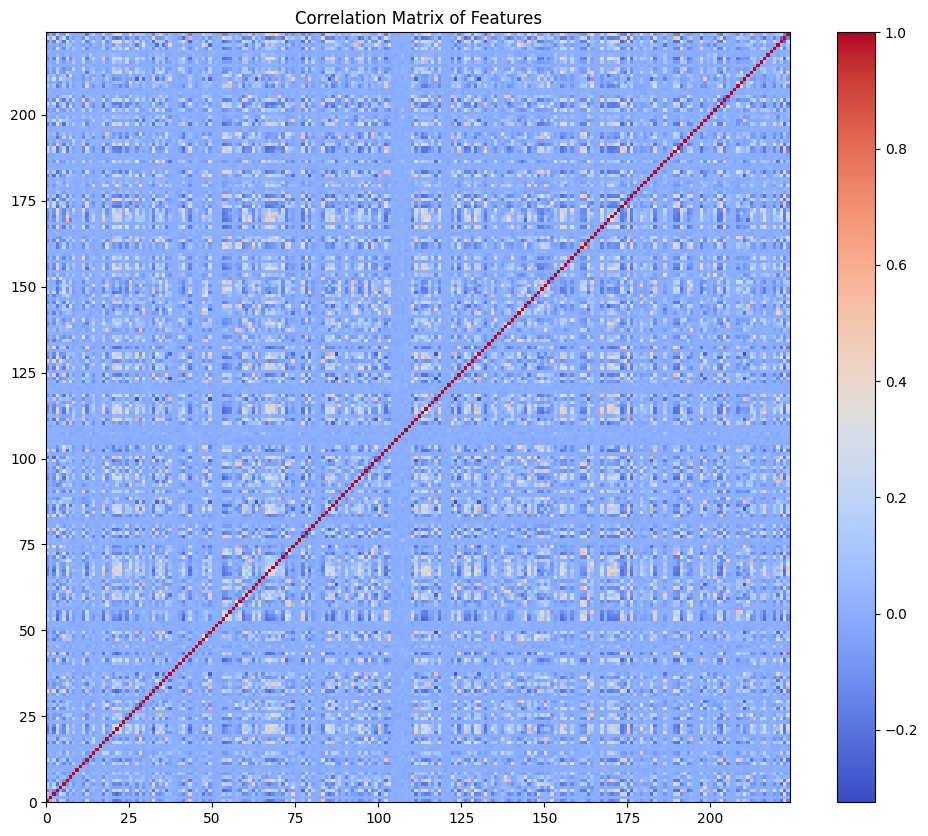

In [ ]:
# Print the correlation matrix for the features as a heatmap
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
plt.pcolor(correlation_matrix, cmap='coolwarm', rasterized=True)
plt.colorbar()
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Find pairs of highly correlated features
high_corr_pairs = np.where(np.abs(correlation_matrix)>0.8)
high_corr_features = [
    (i, j) for i, j in zip(*high_corr_pairs) if i != j and i < j
]
# Print the highly correlated features
print(f"Highly Correlated Features: {high_corr_features}")

Highly Correlated Features: []


From the Correlation matrix and the code above we can see that there are no highly correlated features (>0.8) so there are no redundant features in terms of correlation.

##**Scale the feature space**##

Scaling is unnecessary for non-distance-based algorithms. Distance-based models, on the other hand, require all features to be scaled. That's why we will scale all our features so we can use the scaled samples on both distance and non-distance based algorithms.

We will use the **StandardScaler()** to perform Z-score scaling (standardization) on the features (x_scaled=x-μ/σ)

In [ ]:
#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##**Check for multivariate normality distribution**##

We want to check if our dataset samples follow a normal distribution. This is necessary before applying any procedures or using any models that assume multivariate normality (LDA, QDA, Gaussian Naive Bayes, PCA..)
We will use a visual method to check for multivariate normality of our data, which is to make a QQ Plot (Quantile-Quantile plot) of the mahalanobis distances squared against a theoretical Chi-Squared distribution. We expect the plot to fall on a diagonal line if the data follows a normal distribution.

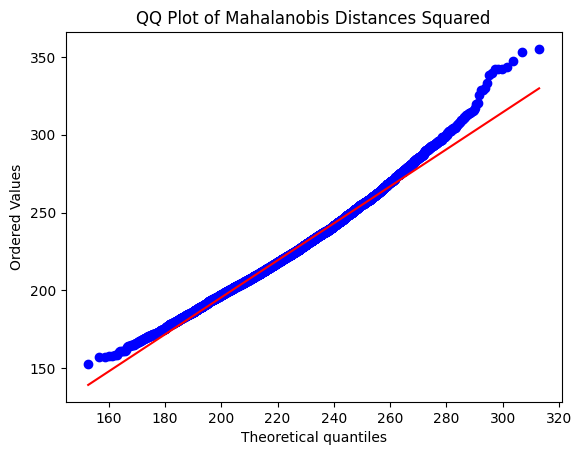

In [ ]:
# Check multivariate normality using a QQ plot of Mahalanobis distances squared, which should follow a chi-squared distribution with degrees of freedom equal to the number of features
# Calculate Mahalanobis distances squared
mean = np.mean(X_scaled, axis=0)
cov = np.cov(X_scaled.T)
inv_cov = np.linalg.inv(cov)
distances_squared = [np.dot(np.dot((x-mean).T, inv_cov), (x-mean)) for x in X_scaled]

import scipy.stats as stats
# Create a Q-Q plot
stats.probplot(distances_squared, dist="chi2", sparams=(numOfFeatures,), plot=plt)
plt.title('QQ Plot of Mahalanobis Distances Squared')
plt.show()

As we can see from the QQ plot, there are deviations from the diagonal line which indicates that the data deviates from a multivariate normal distribution.
We have to try and normalize the data so the models and procedures that will handle them in an optimal way.

First attempt:
Compute the skewness and apply transformations to reduce skewness

In [ ]:
# Calculate skewness for each feature
X_df = pd.DataFrame(X_scaled)
skewness = X_df.skew()

# Set a threshold for skewness
threshold = 0.5

# Identify skewed features
skewed_features = skewness[abs(skewness) > threshold]

# Print the skewed features and their skewness values
print(f"Skewed features (|skewness| > {threshold}):")
print(skewed_features)

# Count of skewed features
print(f"Number of skewed features: {len(skewed_features)}")

Skewed features (|skewness| > 0.5):
3      0.678814
4      0.654544
8      0.544705
11     0.789919
20     0.649234
22     0.587792
24     0.778516
33     0.631735
35     0.797034
41     0.772638
49     0.519096
59     0.731136
60     0.716065
65     0.629750
71     0.855788
74     0.537936
78     0.800497
86     0.552494
90     0.721810
94     0.549068
95     0.792632
97     0.776385
113    0.720415
114    0.585139
116    0.563024
118    0.716602
126    0.674725
128    0.626089
129    0.593211
135    0.745311
140    0.737162
152    0.660785
153    0.675041
155    0.547142
156    0.802180
158    0.806547
163    0.675725
167    0.718296
171    0.552880
172    0.798346
186    0.778836
191    0.736815
197    0.740364
198    0.500734
199    0.634148
201    0.785986
204    0.764775
213    0.673100
215    0.576599
216    0.612793
219    0.770534
221    0.506441
dtype: float64
Number of skewed features: 52


We will apply a Yeo-Johnson transformation from the scipy.stats library to the skewed features. This transformation handles negative values as well in contrast to root and log transformations which handle positive data only.

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X_transformed = X_scaled.copy()
# Apply Yeo-Johnson transformation (generalized version of Box-Cox transformation that also works for negative data) to these skewed features

X_transformed[skewed_features.index] = pt.fit_transform(X_scaled[skewed_features.index])

Now we check again the QQ-Plot of the transformed data to see if the transformation brought it any closer to normality.

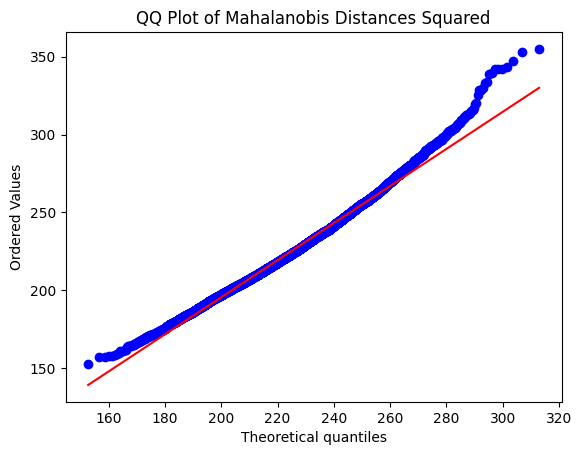

In [ ]:
# Calculate Mahalanobis distances squared
mean = np.mean(X_transformed, axis=0)
cov = np.cov(X_transformed.T)
inv_cov = np.linalg.inv(cov)
distances_squared = [np.dot(np.dot((x-mean).T, inv_cov), (x-mean)) for x in X_transformed]

import scipy.stats as stats
# Create a Q-Q plot
stats.probplot(distances_squared, dist="chi2", sparams=(numOfFeatures,), plot=plt)
plt.title('QQ Plot of Mahalanobis Distances Squared')
plt.show()

The transformation didn't help bring the distribution closer to normality, so we try again by reducing the dimensionality of our data using PCA.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)  # This will retain 90% of the variance
X_pca = pca.fit_transform(X_scaled)
# Number of Components
print(f"Number of components: {pca.n_components_}")

Number of components: 162


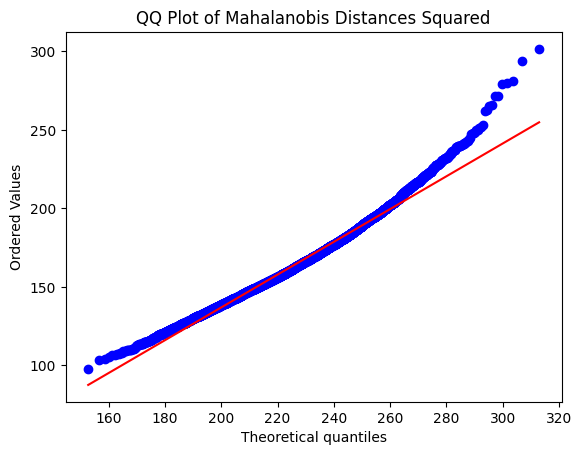

In [ ]:
# Calculate Mahalanobis distances squared
mean = np.mean(X_pca, axis=0)
cov = np.cov(X_pca.T)
inv_cov = np.linalg.inv(cov)
distances_squared = [np.dot(np.dot((x-mean).T, inv_cov), (x-mean)) for x in X_pca]

import scipy.stats as stats
# Create a Q-Q plot
stats.probplot(distances_squared, dist="chi2", sparams=(numOfFeatures,), plot=plt)
plt.title('QQ Plot of Mahalanobis Distances Squared')
plt.show()

This didn't help either. We notice that the edges of the plot are above the line, which indicates that our data has heavier tails than a normal distribution. So maybe outlier detection and removal will bring the distribution closer to normality.

##**Multivariate Outlier Detection**##

We want to check for outliers in our data that have extreme values in multiple features and not just one (multivariate outliers). For that purpose we will calculate the mahalanobis distance for each sample and will classify as outliers those that have a high distance squared value compared to a chi-square distribution

In [ ]:
from scipy.stats import chi2
mean = np.mean(X_scaled, axis=0)
cov_matrix = np.cov(X_scaled.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Compute mahalanobis distance squared for each sample
mahalanobis_distances_squared = []
for x in X_scaled:
    diff = x - mean
    dist_sq = np.dot(np.dot(diff, inv_cov_matrix), diff.T)
    mahalanobis_distances_squared.append(dist_sq)

# Determine a chi-square threshold
p = X_scaled.shape[1] # Number of features
chi_square_threshold = chi2.ppf(0.999, df=p) # 99,9% confidence level only extreme outliers removed

# Identify outliers
outlier_samples = np.where(np.array(mahalanobis_distances_squared) > chi_square_threshold)[0]

print(f"Number of outliers: {len(outlier_samples)}")

Number of outliers: 82


In [ ]:
# Now we will create a new dataset without the outliers we detected, by dropping outliers on the original dataset X
X_clean = np.delete(X, outlier_samples, axis=0)
y_clean = y.drop(outlier_samples)

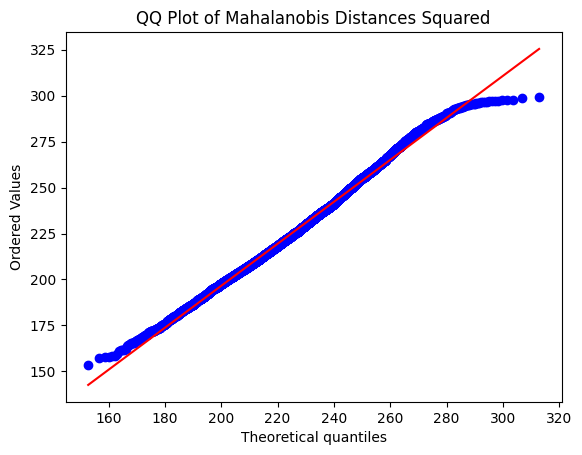

In [ ]:
# Calculate Mahalanobis distances squared
mean = np.mean(X_clean, axis=0)
cov = np.cov(X_clean.T)
inv_cov = np.linalg.inv(cov)
distances_squared = [np.dot(np.dot((x-mean).T, inv_cov), (x-mean)) for x in X_clean]

import scipy.stats as stats
# Create a Q-Q plot
stats.probplot(distances_squared, dist="chi2", sparams=(numOfFeatures,), plot=plt)
plt.title('QQ Plot of Mahalanobis Distances Squared')
plt.show()

Points below the line on the Q-Q Plot on the right side means the right tail of the distribution is light, that means it has less extreme values than expected. However that's as close as we can get to the normal distribution so we are fine with it.

We should scale the data after we removed the outliers. We don't use the already fitted scaler because he had been affected by the outliers. Instead we fit it again on the clean data and scale them

In [ ]:
#Scale the features
X_final = scaler.fit_transform(X_clean)
y_final = y_clean

##**Split the dataset into training and validation**##

Splitting the scaled datasetTV into Training and Validation subsets with a proportion of 80%-20%.
Some of the models we will try later implement cross validation using the cross_val_score(). On these models we will pass the whole X dataset. However on some models that we don't do cross validation we still need to have an estimation of their performance. On those we will use the validation set X_val to compute their accuracy.

In [ ]:
from posixpath import split
#Splitting into training and validation
split_ratio = 0.8
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=1-split_ratio, random_state=42)

Visualization of the splitted datasetTV

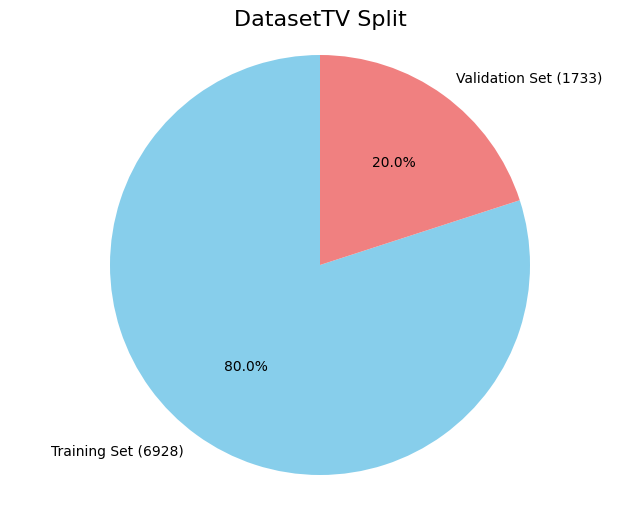

In [ ]:
# Dataset sizes
train_size = len(X_train)
val_size = len(X_val)
# Labels and sizes for the pie chart
labels = [f'Training Set ({train_size})', f'Validation Set ({val_size})']
sizes = [train_size, val_size]
colors = ['skyblue', 'lightcoral']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, )
plt.title('DatasetTV Split', fontsize=16)
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

##**Check the distribution of the classes**##

Now we will create a bar plot, to see the distribution of the labels

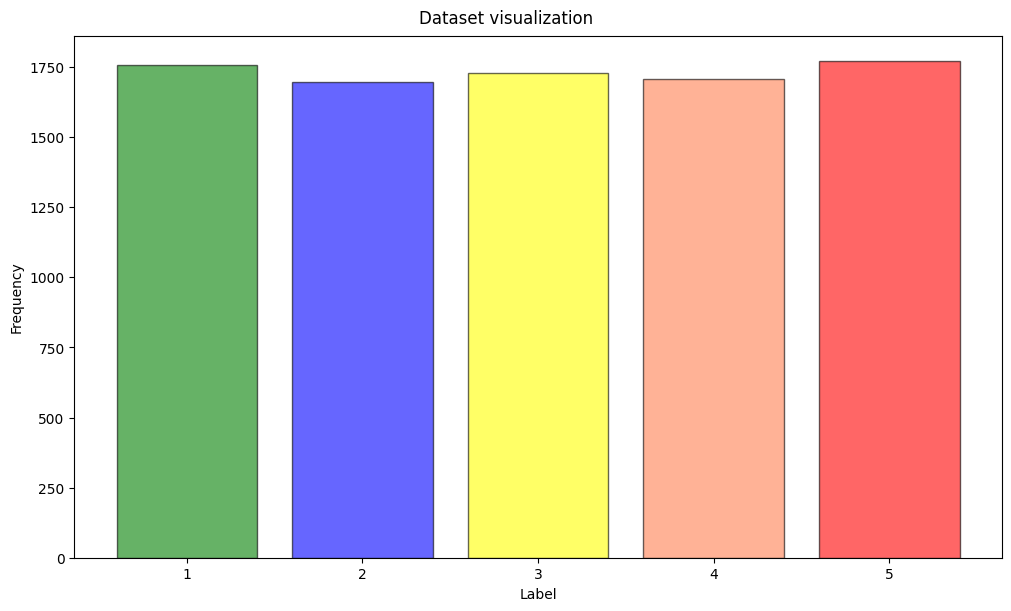

In [ ]:
# Label distribution of the dataset
def plot_dataset_labels(y):
  fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
  y_unique, y_unique_counts = np.unique(y, return_counts=True) # Find all the unique labels and the times each label appears
  ax.bar(y_unique, y_unique_counts,
              align='center',
              color=['green', 'blue', 'yellow', 'coral', 'red'],
              edgecolor = 'k',
              alpha=0.6)
  ax.set_xlabel('Label')
  ax.set_ylabel('Frequency')
  ax.set_xticks(y_unique)

plot_dataset_labels(y_clean)
plt.suptitle('Dataset visualization')
plt.show()

As we can see, the dataset seems to be balanced so we don't have to do anything more on that.

##**Apply the same preprocessing pipeline to the datasetTest**##

**Display datasetTest.csv and visualize it**

In [ ]:
datasetTest = pd.read_csv('datasetTest.csv', header=None)
display(datasetTest)
datasetTest.describe()
# Check for missing values
print(datasetTest.isnull().values.any())

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,-0.109350,0.395970,0.26329,0.502950,-0.093102,1.319300,1.358700,0.28075,-0.008518,0.353820,...,0.070452,-0.220130,1.135400,0.138760,-0.422860,0.00038,1.139100,0.101050,0.183390,1.115900
1,0.105750,0.007806,0.58283,0.551200,-0.217170,1.663500,-0.312970,1.44050,0.202840,0.016851,...,-0.003008,0.215550,0.379270,-0.614030,-0.119610,0.19664,0.710100,0.635520,1.478300,0.322430
2,0.097971,-0.053154,0.37630,-0.058856,0.006567,0.137660,0.032735,1.13770,0.356440,-0.389540,...,-0.534020,-0.231480,-0.033949,0.195680,0.400540,-0.38696,0.170160,0.061788,0.954900,0.047166
3,-0.743000,-0.358030,-0.21905,-0.114940,-0.244360,0.070451,0.919700,0.94458,0.187610,-0.073309,...,-0.047957,-0.071473,0.638930,0.185020,0.077877,0.24963,0.965670,0.347700,0.293610,0.098366
4,-0.386140,-0.498410,-0.69222,0.338690,-0.116860,0.205000,0.340050,0.73721,-0.384540,0.265610,...,-0.115280,0.031800,0.300810,0.184990,0.308160,-0.28450,0.178380,0.278690,0.034436,0.338630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950,-0.062724,-0.481300,-0.22064,0.656690,0.314780,1.274600,-0.003921,1.00170,0.356950,0.113740,...,0.180470,-0.356300,0.022257,-0.483350,-0.476370,0.15728,0.008561,0.599400,0.910490,0.166990
6951,1.375000,1.691900,1.14940,0.738350,0.581810,0.115130,-0.354980,0.52019,1.081100,-0.626940,...,-0.156410,0.925300,0.030693,0.233090,0.304220,0.93494,0.295560,0.867090,1.496100,-0.063890
6952,0.184640,0.536430,0.12334,-0.079382,-0.439170,1.582500,0.206980,0.13921,0.386700,-0.065247,...,0.080351,-0.369440,-0.156400,-0.056567,-0.073901,0.46305,1.049600,-0.030132,1.109800,0.032953
6953,0.694530,-0.028510,-0.10037,0.575170,-0.272010,0.719870,0.061503,-0.54127,-0.092856,-0.310480,...,-0.057575,-0.126070,-0.370480,0.627690,-0.170440,-0.51748,-0.038663,0.396800,0.832250,0.346880


False


**datasetTest does not include labels!**

In [ ]:
X_test = datasetTest.iloc[: , :] #Select all the rows and all the columns , from the datasetTest
y_test = None

We will use the same scaler as before, StandardScaler() to scale the Test set

In [ ]:
#Scale the features with the same scaler from before
X_test_scaled = scaler.transform(X_test)

##**Check whether the data is linearly seperable or nonlinear, using t-SNE (t-Distributed Stochastic Neighbor Embedding)**##

t-Distributed Stochastic Neighbor Embedding (t-SNE): t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction approach that is particularly useful for displaying high-dimensional datasets. It operates by retaining the data’s local structure, which means that points that are close together in the original space will be close together in the lower-dimensional space as well. t-SNE is frequently used in data visualisation since it can assist in identifying patterns and relationships in the data.

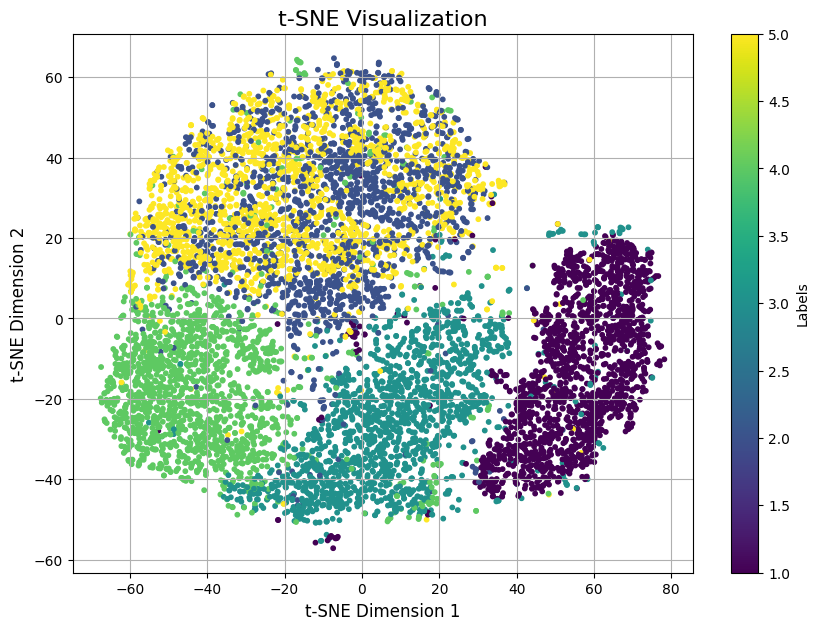

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30) #perplexity controls the balance between local and global structure (default is 30)
X_tsne = tsne.fit_transform(X_clean)

# Plot t-SNE results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_clean, cmap='viridis', s=10)  # c=y to color by labels
plt.colorbar(scatter, label="Labels")
plt.title("t-SNE Visualization", fontsize=16)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.grid(True)
plt.show()

We can see from the plot that classes 1, 3 and 4 can be linearly separated. There might be some difficulty with classes 5 and 2.

# **Random Forest**

Firstly, we will use the Random Forest Classifier. More specifically, we will implement the K-fold Cross Validation method with k = 4, in order to find the hyperparameters that best fit our training data. Having said that, the datasetTV will be splitted into four sub-datasets, each constituting 25% of the initial datasetTV. The model is trained on three of the folds and tested on the remaining fold.

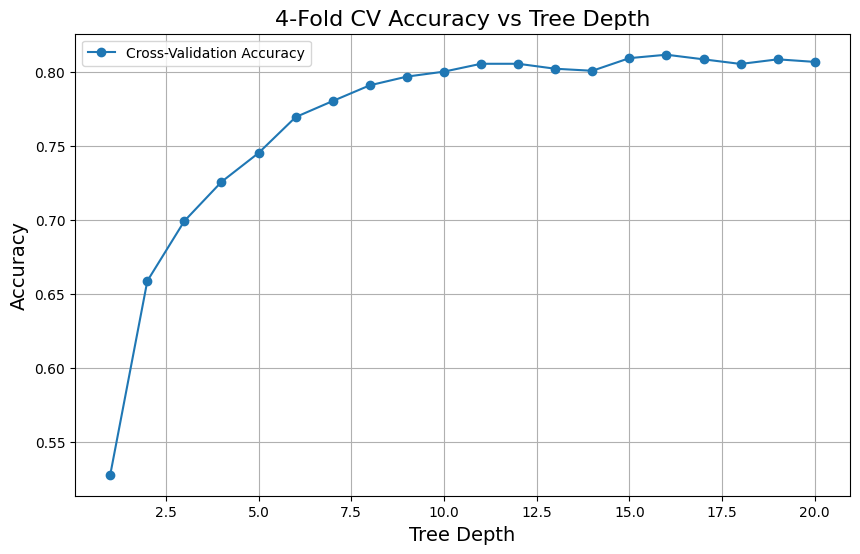

The best tree depth is 16 with an accuracy of 0.812.


In [ ]:
# Perform 4-fold cross-validation to find the best tree depth
depths = range(1, 21)  # Tree depths to evaluate
n_trees = 100          # Fixed number of trees
cv_folds = 4           # Number of cross-validation folds
accuracies = []        # To store mean cross-validation accuracy

# Loop through depths to perform 4-fold cross-validation for each depth
for depth in depths:
    random_forest = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, random_state=42, bootstrap=True, max_features='sqrt')
    # max_features='sqrt' to specify the number of features to consider, when looking for the best split at each node in the decision trees.
    # Perform 4-fold cross-validation and compute the mean accuracy
    cv_scores = cross_val_score(random_forest, X_final, y_final, cv=cv_folds, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)

    # Store the mean accuracy for this depth
    accuracies.append(mean_cv_score)

# Plot the cross-validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', label='Cross-Validation Accuracy')
plt.title("4-Fold CV Accuracy vs Tree Depth", fontsize=16)
plt.xlabel("Tree Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Identify the depth with the best accuracy
best_accuracy = max(accuracies)
best_depth = depths[accuracies.index(best_accuracy)]
print(f"The best tree depth is {best_depth} with an accuracy of {best_accuracy:.3f}.")

# **K-Nearest Neighbor**

KNN can suffer from the **curse of dimensionality** when the number of features is large. That's why we will use PCA on the training set of this model to reduce the number of dimensions and help KNN focus on the most important features.

In [ ]:
# Apply PCA to reduce dimensions to 22 (22 selected through trial & error)
from sklearn.decomposition import PCA
pca_knn = PCA(n_components=22)
X_pca = pca_knn.fit_transform(X_final)
# Extract the dataset in the new PCA space
X_pca_df = pd.DataFrame(X_pca)

# Check how much variance is explained by the selected components
explained_variance = np.sum(pca_knn.explained_variance_ratio_)
print(f"Percentage of variance explained by the selected components: {explained_variance * 100:.2f}%")

# Get the number of components selected
n_components = pca_knn.n_components_
print(f"Number of components selected: {n_components}")

Percentage of variance explained by the selected components: 39.41%
Number of components selected: 22


Best k = 9, Best cross validation accuracy = 0.8534


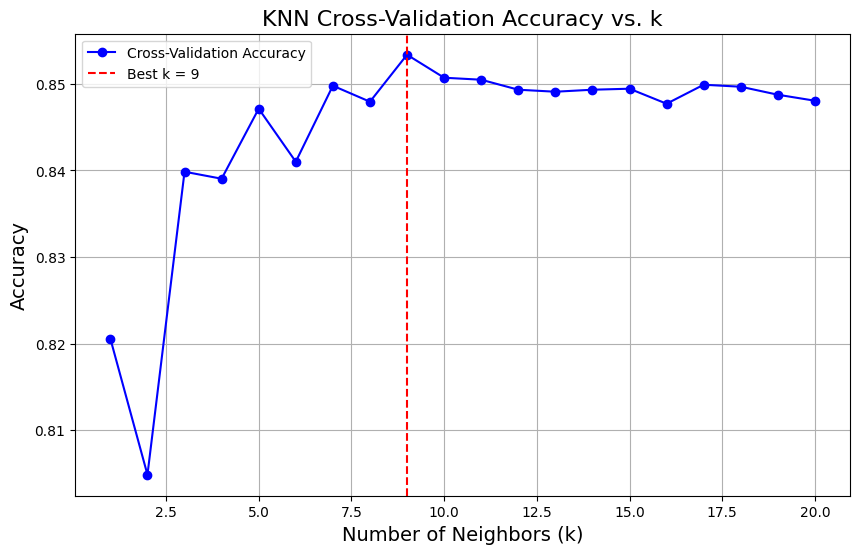

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#Run the training process for k=1..20
cv_results = []
best_accuracy = 0 #baseline for the accuracy
best_k = None #No best k has been determined yet

# Range of k values to evaluate
k_values = range(1, 21)

for k in k_values:
  #Train the model
  knn = KNeighborsClassifier(n_neighbors=k)
  #Perform a 4-fold cross validation and calculate the mean accuracy score
  cv_scores = cross_val_score(knn, X_pca, y_final, cv=4, scoring='accuracy')
  cv_results.append(np.mean(cv_scores))
  mean_accuracy = np.mean(cv_scores)

  #find the best accuracy
  if mean_accuracy > best_accuracy:
     best_accuracy = mean_accuracy
     best_k = k

# Print the results
print (f'Best k = {best_k:}, Best cross validation accuracy = {best_accuracy:.4f}')

# Plot k vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_results, marker='o', linestyle='-', color='b', label='Cross-Validation Accuracy')
plt.title("KNN Cross-Validation Accuracy vs. k", fontsize=16)
plt.xlabel("Number of Neighbors (k)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.axvline(best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.grid(True)
plt.show()

# Fit the best model to the training data
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_pca, y_final)

# **AdaBoost**

Again, we are going to use 4-fold cross validation to calculate the accuracy.
More specifically, for each combination of the hyperparameters an AdaBoost classifier is trained, then the mean accuary over 4 folds is calculated.

The best number of estimators is 90, the best learning rate is 0.5, with an accuracy of 0.657.


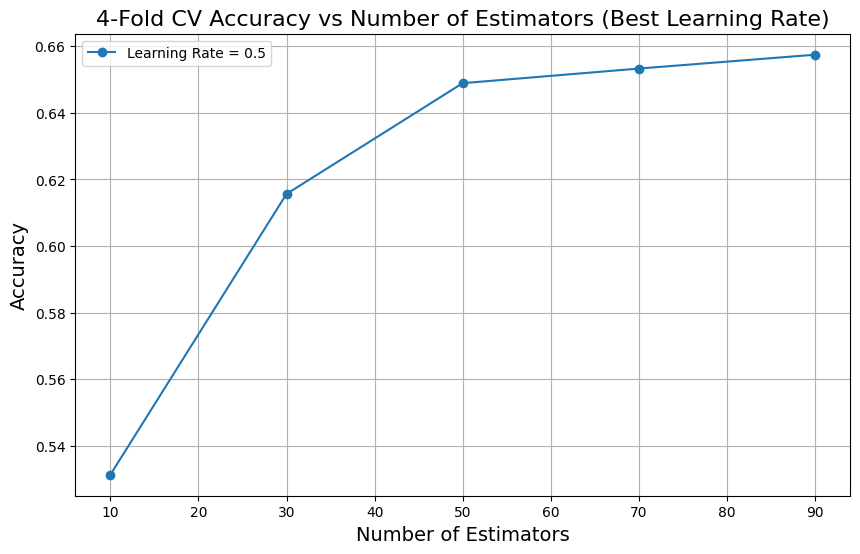

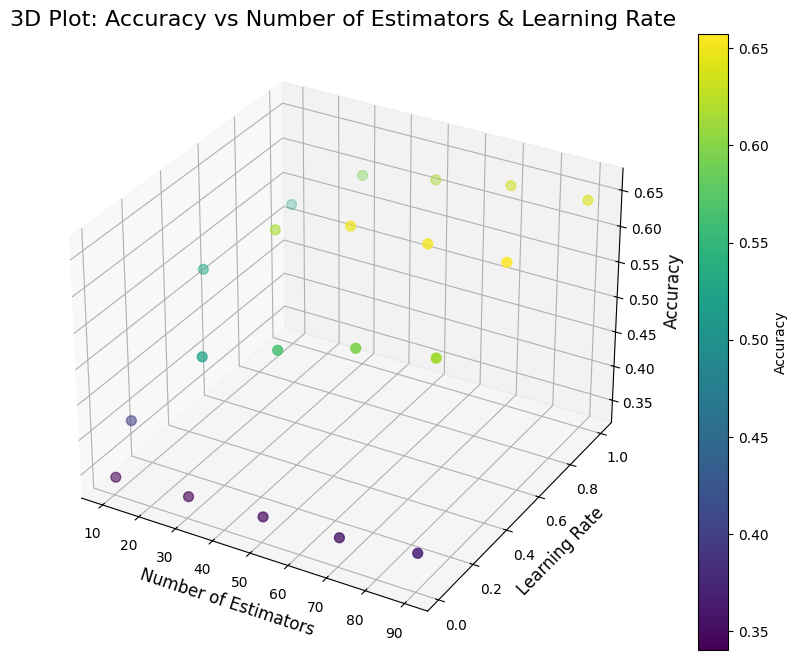

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define ranges for hyperparameters to evaluate
n_estimators_range = range(10, 101, 20)  # Number of estimators: 10 to 200 in steps of 20 - Number of weak learners to test
learning_rate_range = [0.01, 0.1, 0.5, 1]  # Learning rate values to test - Controls the influence of each  weak learner
cv_folds = 4  # Number of cross-validation folds

# To store cross-validation results (n_estimators, learning_rate, mean_accuracy) for each combination of the hyperparameters
cv_results = []

for n_estimators in n_estimators_range: #Iterates over different values of n_estimators
    for learning_rate in learning_rate_range: #Iterates over different learning_rate values
        ada_boost = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42) #for each combination of the hyperparameters(n_estimators, learning_rate), a new instance of the AdaBoostClassifier is created


        cv_scores = cross_val_score(ada_boost, X_final, y_final, cv=cv_folds, scoring='accuracy') #performs 4-fold cross-validation for the current combination of the hyperparameters
        mean_cv_score = np.mean(cv_scores) #computes the mean accuracy across the 4 folds

        # Append the results as a tuple (n_estimators, learning_rate, mean_accuracy)
        cv_results.append((n_estimators, learning_rate, mean_cv_score))

# Find the best hyperparameter combination
best_params = max(cv_results, key=lambda x: x[2])  # Find the tuple with the highest accuracy (third element in each tuple)
best_n_estimators, best_learning_rate, best_accuracy = best_params

print(f"The best number of estimators is {best_n_estimators}, the best learning rate is {best_learning_rate}, "
      f"with an accuracy of {best_accuracy:.3f}.")

# Plot the cross-validation results
accuracies = [x[2] for x in cv_results if x[1] == best_learning_rate]  # Filter results for the best learning rate
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', label=f'Learning Rate = {best_learning_rate}')
plt.title("4-Fold CV Accuracy vs Number of Estimators (Best Learning Rate)", fontsize=16)
plt.xlabel("Number of Estimators", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

#3D plot to visualize the relationship between n_estimators, learning_rate, and accuracy.
# Extract the results for the 3D plot
n_estimators_vals = [x[0] for x in cv_results]  # Number of estimators
learning_rate_vals = [x[1] for x in cv_results]  # Learning rates
accuracy_vals = [x[2] for x in cv_results]  # Cross-validation accuracies

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for accuracies
sc = ax.scatter(n_estimators_vals, learning_rate_vals, accuracy_vals, c=accuracy_vals, cmap='viridis', s=50)

# Labels and title
ax.set_title('3D Plot: Accuracy vs Number of Estimators & Learning Rate', fontsize=16)
ax.set_xlabel('Number of Estimators', fontsize=12)
ax.set_ylabel('Learning Rate', fontsize=12)
ax.set_zlabel('Accuracy', fontsize=12)

# Add a color bar to show the scale of accuracy
plt.colorbar(sc, ax=ax, label='Accuracy')

# Show the plot
plt.show()


# **Naive Bayes**

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayesScore = naive_bayes.score(X_val, y_val)
print(f"Best accuracy is: {naive_bayesScore:.4f} ")

Best accuracy is: 0.7005 


# **Linear or Quadratic Discriminant Analysis?**

Linear Discriminant Analysis assumes that the data in each class is normally distributed and has the same correlation matrix. It finds a linear combination of features that best separates the classes apart.
QDA (Quadratic Discriminant Analysis) is similar to LDA but does not assume that the correlation matrices of each class are equal. This helps QDA to build more flexible decision limits by describing each class with its own correlation matrix.

So in order to decide which of the two is better for our dataset, we have to compare the Correlation Matrices of each class. If they are similar we should use LDA. Otherwise, QDA should be preffered.

For that reason we use the **Statistical Test of Box's M Test** to compare the covariance matrices for each class.

In [ ]:
import numpy as np
from scipy.stats import chi2

def box_m_test(data, labels):
    """
    Perform Box's M test to check the equality of covariance matrices across classes.

    Parameters:
    data (numpy.ndarray): Dataset (rows are samples, columns are features).
    labels (numpy.ndarray): Class labels corresponding to each sample.

    Returns:
    M_adj: Adjusted M statistic. A measure of how much the covariance matrices differ.
    p_value: P-value for the test.
    p<0.05: Significant difference in covariance matrices, use QDA.
    𝑝≥0.05: No significant difference, use LDA.
    """
    # Separate data by class
    classes = np.unique(labels)
    n_classes = len(classes)
    n_features = data.shape[1]

    # Compute covariance matrices and sample sizes for each class
    cov_matrices = []
    n_samples = []
    for cls in classes:
        class_data = data[labels == cls]
        cov_matrices.append(np.cov(class_data, rowvar=False))
        n_samples.append(class_data.shape[0])

    # Compute pooled covariance matrix
    N = sum(n_samples)
    pooled_cov = sum((n - 1) * cov for n, cov in zip(n_samples, cov_matrices)) / (N - n_classes)

    # Compute M statistic
    M = (N - n_classes) * np.log(np.linalg.det(pooled_cov))
    M -= sum((n - 1) * np.log(np.linalg.det(cov)) for n, cov in zip(n_samples, cov_matrices))

    # Correction factor
    C = ((2 * n_features + 3) / (6 * (n_features + 1))) * (sum(1 / (n - 1) for n in n_samples) - 1 / (N - n_classes))
    M_adj = M * (1 - C)

    # Degrees of freedom
    df = (n_classes - 1) * n_features * (n_features + 1) // 2

    # Compute p-value
    p_value = chi2.sf(M_adj, df)

    return M_adj, p_value

# Apply the Box's M test to scaled data
box_m_test(X_final, y_final)

(196593.63874389278, 0.0)

**Results Interpretation**


---

The P-value (0.0) is below the significance threshold (typically 0.05). That indicates that there is statistically significant differences in the covariance matrices of the classes. Thus, the QDA seems to be more appropriate for this dataset.
Let us now confirm these results in practice.



# **Linear Discriminant Analysis (LDA)**

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
ldaScore = lda.score(X_val, y_val)
print(f"Best accuracy is: {ldaScore:.4f} ")

Best accuracy is: 0.7628 


# **Quadratic Discriminant Analysis (QDA)**

Again, we will use 4-fold cross validation to find the optimal regularization parameter (reg_param) to control the coveriance matrix regularization in order for our model to generalize well

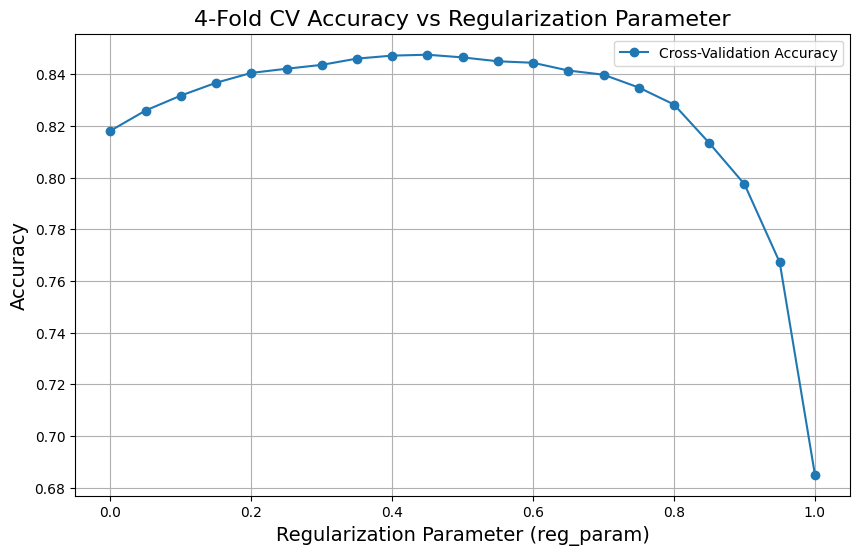

The best regularization parameter is 0.45 with an accuracy of 0.848.


In [ ]:
# Use PCA on the training data for QDA
pca_qda = PCA(n_components=0.9)
X_pca = pca_qda.fit_transform(X_final)

# Initialize the Quadratic Discriminant Analysis


# Range of regularization parameters to evaluate
reg_params = np.linspace(0, 1, 21)  # Regularization from 0 to 1 in steps of 0.1
cv_folds = 4  # Number of cross-validation folds
accuracies = []  # To store mean cross-validation accuracy

# Loop through regularization parameters to perform 4-fold cross-validation
for reg_param in reg_params:
    qda = QuadraticDiscriminantAnalysis(reg_param=reg_param)

    # Perform 4-fold cross-validation and compute the mean accuracy
    cv_scores = cross_val_score(qda, X_pca, y_final, cv=cv_folds, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)

    # Store the mean accuracy for this regularization parameter
    accuracies.append(mean_cv_score)

# Plot the cross-validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(reg_params, accuracies, marker='o', label='Cross-Validation Accuracy')
plt.title("4-Fold CV Accuracy vs Regularization Parameter", fontsize=16)
plt.xlabel("Regularization Parameter (reg_param)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Identify the best regularization parameter
best_accuracy = max(accuracies)
best_reg_param = reg_params[accuracies.index(best_accuracy)]
print(f"The best regularization parameter is {best_reg_param:.2f} with an accuracy of {best_accuracy:.3f}.")

**Indeed, we confirm both theoretically and practically that QDA is more appropriate for our dataset than LDA, and gives the highest accuracy not only between those two, but among all the Classifiers**

# **Implement the final model on our test set**

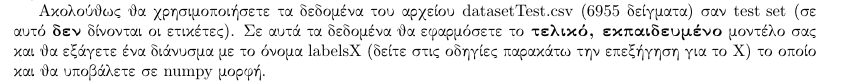



---



**Since the k-NN Classifier gave the best accuracy
among the Classifiers, we are going to implement this method on our final Test
set**



---



Implement the KNN model on our final Test set


In [ ]:
# Apply the same PCA to the test data
X_pca_test = pca_knn.transform(X_test_scaled)

# Apply the knn model with the best hyperparameter k to the test set
labels37 = best_knn.predict(X_pca_test)
print(f"{len(labels37)} samples classified")

6955 samples classified


In [ ]:
# Save the predictions
np.save('labels37.npy', labels37)
np.savetxt('labels37.csv', labels37, fmt='%d', delimiter=',')

# Download the .npy file
files.download('labels37.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now we create a bar plot, to see the distribution of the values in the labels, in all our samples.

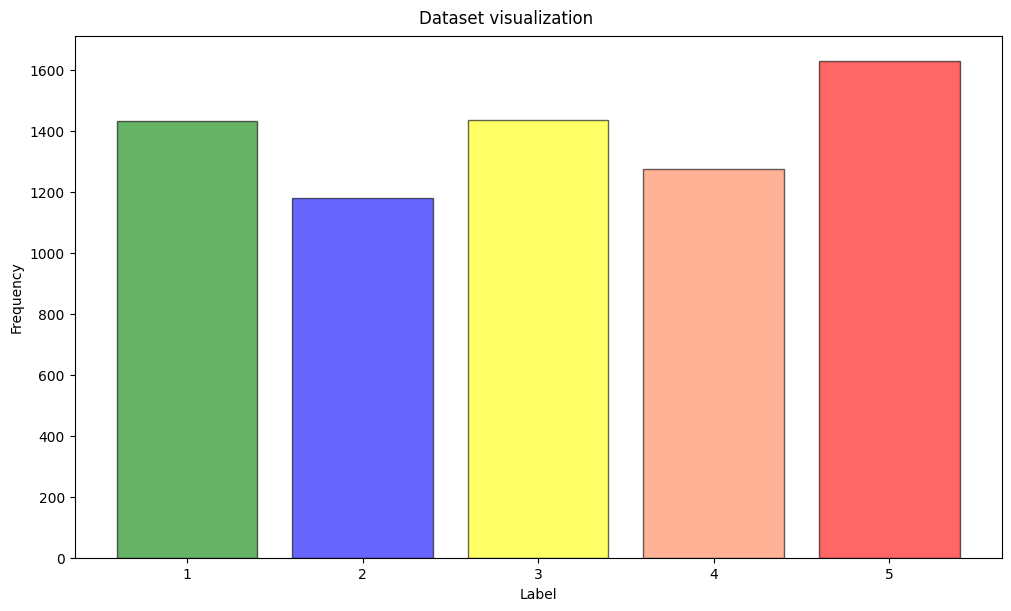

In [ ]:
# Label distribution of the dataset
def plot_dataset_labels(y):
  fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
  y_unique, y_unique_counts = np.unique(y, return_counts=True) # Find all the unique labels and the times each label appears
  ax.bar(y_unique, y_unique_counts,
              align='center',
              color=['green', 'blue', 'yellow', 'coral', 'red'],
              edgecolor = 'k',
              alpha=0.6)
  ax.set_xlabel('Label')
  ax.set_ylabel('Frequency')
  ax.set_xticks(y_unique)

plot_dataset_labels(labels37)
plt.suptitle('Dataset visualization')
plt.show()